<a href="https://colab.research.google.com/github/dhigh348/liquor_sales/blob/master/liquor_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

plt.rcParams['figure.figsize'] = [15, 8]

In [ ]:
dir = '/content/drive/My Drive/BeerData/'

In [ ]:
df = pd.read_csv(dir+'liquor_sales.csv')

In [ ]:
def edit_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function takes a dataframe and edits the column names for standardization. 
    This includes removing spaces and replacing them with underscores. Also,
    the titles are lowercased.
    
    :args: dataframe to standardize the columns
    :returns: dataframe with the column names standardized
    """
    lower_cols = [col.lower().replace(' ', '_') for col in df.columns]
    df.columns = lower_cols
    return df

In [ ]:
# changing the names of the columns 
df = edit_columns(df)

In [ ]:
df.describe()

,year,month,retail_sales,retail_transfers,warehouse_sales
count,115255.000000,115255.000000,115255.000000,115255.000000,115255.000000
mean,2017.115787,7.656622,6.633938,7.317510,22.896380
std,0.319970,3.396638,29.360282,31.305271,243.364269
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.320000,0.000000,1.000000
75%,2017.000000,11.000000,3.270000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


We will remove the negative values and na values. The negative values usually represent inventory misprocessing and thus shouldn't be included.

In [ ]:
def remove_negatives_and_na(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Function takes a dataframe and a list of column names, and procedes to 
    remove the negative values from the sales and transfers incurred. 

    :args: dataframe and list of column names
    :returns: edited dataframe
    """
    for column in columns:
        df = df[df[column] >= 0]
    return df.dropna()

In [ ]:
columns = ['retail_sales', 'retail_transfers', 'warehouse_sales']
df = remove_negatives_and_na(df, columns)

In [ ]:
df.describe()

,year,month,retail_sales,retail_transfers,warehouse_sales
count,114241.000000,114241.000000,114241.000000,114241.000000,114241.000000
mean,2017.115265,7.655220,6.678490,7.383867,23.508839
std,0.319343,3.394359,29.483569,31.435055,241.616664
min,2017.000000,1.000000,0.000000,0.000000,0.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.320000,0.000000,1.000000
75%,2017.000000,11.000000,3.320000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


In [ ]:
df.groupby(by='item_type').mean()

,year,month,retail_sales,retail_transfers,warehouse_sales
item_type,,,,,
BEER,2017.116081,7.651895,13.046628,14.834068,151.661543
KEGS,2017.134923,8.119234,0.000000,0.000000,12.201443
LIQUOR,2017.117119,7.526759,11.131928,12.108459,1.185123
NON-ALCOHOL,2017.129151,7.767528,13.448745,15.069963,14.280849
REF,2017.161290,8.064516,7.660968,4.903226,0.000000
STR_SUPPLIES,2017.114583,7.854167,9.877292,33.184375,0.000000
WINE,2017.113420,7.679499,4.011560,4.391115,5.501090


In [ ]:
df.item_type.value_counts()

WINE            70552
LIQUOR          25188
BEER            14645
KEGS             3187
NON-ALCOHOL       542
STR_SUPPLIES       96
REF                31
Name: item_type, dtype: int64

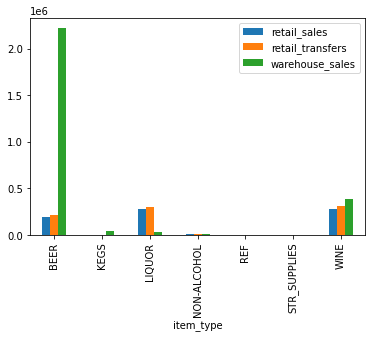

In [ ]:
# checking what the data looks like without the year and the month columns
df.drop(['year', 'month'], axis=1).groupby(by='item_type').sum().plot.bar()

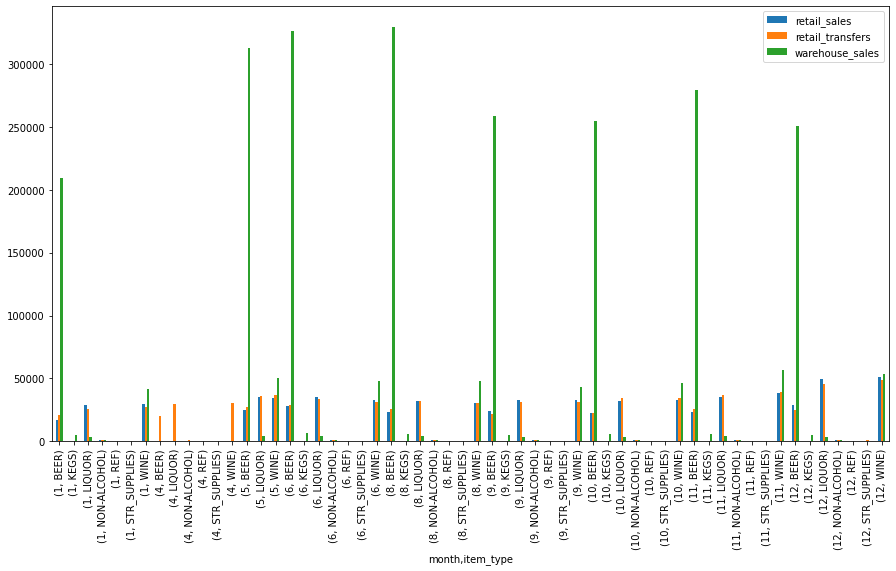

In [ ]:
# checking what the data looks like per month
df.drop(columns=['year']).groupby(['month', 'item_type']).sum().plot.bar()

Here we can see that sales are consistant for much of the year. There seems to be a drop off in the months after January and before May. This may be due to the lack of holidays throughout these months, meaning fewer reasons to purchase liquor (less holidays/parties, less reason for buying liquor). It may be a good idea to advertise for liquor sales during this period to see if sale numbers could be improved. Also, during the months of high sales it would be wise to advertise for specific liquor sales that you want to see. Because people are already purchasing more they may be inclined to buy the suggested "deals" if they are given advertisement for them.

In [ ]:
def print_totals(df: pd.DataFrame, columns: list):
    """
    Printing the totals for each of the liquor types and their sales.
    """
    for item in df.item_type.unique():
        print(item)
        total = 0
        for col in columns:
            sum_total = df[df.item_type == item][col].sum()
            print(f"{col}: { round(sum_total, 2) }")
            total += sum_total
        print(f"total: { round(total, 2) }")
        print()

In [ ]:
print_totals(df, columns)

In [ ]:
def get_totals(df: pd.DataFrame, columns: list) -> dict:
    """
    Function gets the sums for each item types sales and produces the sums.
    args: dataframe and list
    returns: sums of item types
    """
    sums = dict()
    for item in df.item_type.unique():
        sums[item] = []
        for col in columns:
            sums.get(item).append(df[df.item_type == item][col].sum())
        sums.get(item).append(sum(sums.get(item)))
    return sums

In [ ]:
sums = get_totals(df, columns)
counts = dict(df.item_type.value_counts())

In [ ]:
for key in sums.keys():
    print(key)
    print(round(sums.get(key)[-1] / counts.get(key), 2))
    print()

WINE
13.9

LIQUOR
24.43

BEER
179.54

STR_SUPPLIES
43.06

REF
12.56

NON-ALCOHOL
42.8

KEGS
12.2



In [ ]:
# getting the total amount of profit for each of the alcohol sales
drinks = { 'WINE': 17, 'BEER': 15, 'LIQUOR': 17, 'NON-ALCOHOL': 10, 'KEGS': 150 }
total_profit = dict()
warehouse_profit = dict()
retail_profit = dict()
transfer_profit = dict()

for drink in drinks.keys():
    total_profit[drink] = drinks.get(drink) * sums.get(drink)[3]
    warehouse_profit[drink] = drinks.get(drink) * sums.get(drink)[2]
    transfer_profit[drink] = drinks.get(drink) * sums.get(drink)[1]
    retail_profit[drink] = drinks.get(drink) * sums.get(drink)[0]

In [ ]:
# making a bar graph for each of the different profit dictionaries
totals = [retail_profit, transfer_profit, warehouse_profit, total_profit]
for total in totals:
    plt.bar(list(total.keys()), list(total.values()))
    plt.show()

In [ ]:
# getting the sum of the total profits and then getting percentages 
# of each of the different sales
sum_total = 0
for _, value in total_profit.items():
    sum_total += value
print(f"Total profit gained: { round(sum_total, 2) }")

# determining the percentages of each of the liquor types
percentages = dict()
for key, value in total_profit.items():
    percentages[key] = value / sum_total
percentages

Total profit gained: 72640672.67


{'BEER': 0.5429594709175757,
 'KEGS': 0.0802979898947018,
 'LIQUOR': 0.14398140236825538,
 'NON-ALCOHOL': 0.0031934395907074692,
 'WINE': 0.22956769722875975}

Looking above we see that the beer sales for warehouses far outpaces the liquor and wine sales. Beer sales make up half of the total profits while wine and liquor make up the majority of the remaining percentages. 

In [ ]:
# making a sale amount dataframe
sum_df = pd.DataFrame(
    sums.values(), 
    index=sums.keys(), 
    columns=['retail', 'transfers', 'warehouses', 'total'])

In [ ]:
sum_df.head()

,retail,transfers,warehouses,total
WINE,283023.55,309801.92,388112.88,980938.35
LIQUOR,280391.00,304987.87,29850.89,615229.76
BEER,191067.86,217244.92,2221083.30,2629396.08
STR_SUPPLIES,948.22,3185.70,0.00,4133.92
REF,237.49,152.00,0.00,389.49


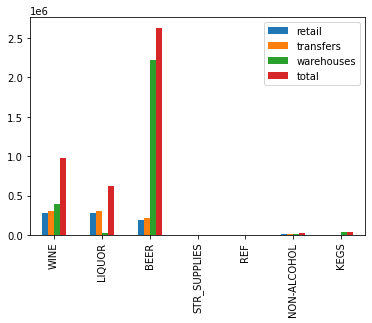

In [ ]:
sum_df.plot.bar()

In [ ]:
sales_df = pd.read_csv(dir+'total_sales.csv')

In [ ]:
sales_df.head()

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
sales_df.columns = ['date', 'total']

In [ ]:
sales_df

,date,total
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
337,2020-02-01,4533
338,2020-03-01,5521
339,2020-04-01,5211
340,2020-05-01,6263


In [ ]:
sales_df.index = sales_df.date

In [ ]:
sales_df = sales_df.drop('date', axis=1)

In [ ]:
sales_df


,total
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2020-02-01,4533
2020-03-01,5521
2020-04-01,5211


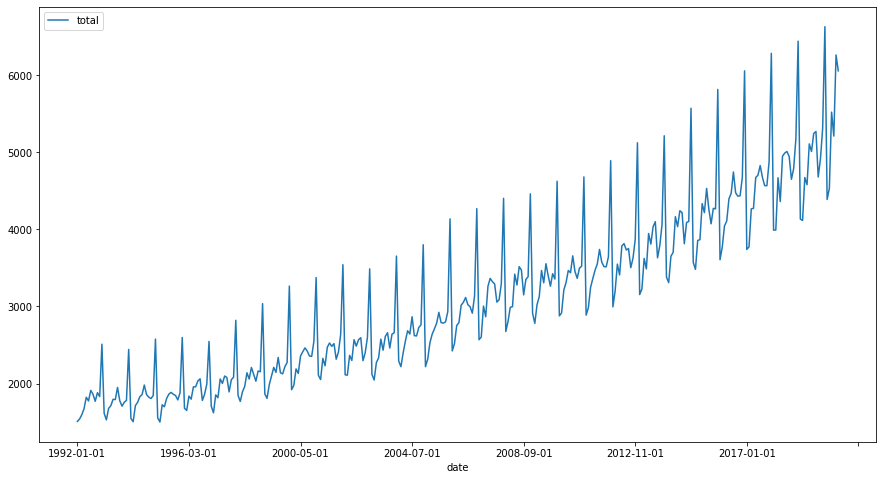

In [ ]:
sales_df.plot()

We can see that alcohol sales have increased over the last ~30 years. The beginning sale amount in January of 2017 is around the peak sales of 2004. Another trend that we see is the same as above, showing that the sales of alcohol peak towards the end of the year (holiday season) and begin to spike during the summer time. 

An interesting abnormality is the year of 2020, which saw a pandemic begin in February causing the amount of sales to increase abnormally. This caused the spike to begin in March, and it still hasn't slowed.

In [ ]:
pandemic_df = sales_df.tail(24)

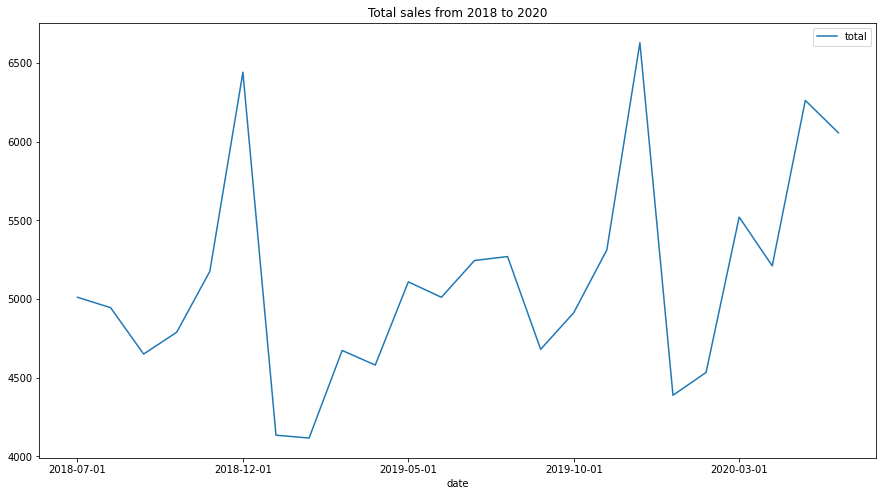

In [ ]:
pandemic_df.plot(title='Total sales from 2018 to 2020')

As can be seen above the max peak in 2018 and 2019 have almost been reached by June of 2020. With people being home and not having anything to do, people have been buying liquor at a rate that was only matched during the holiday seasons of previous years.